# Linear Regression
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Null Information](#c3-1)
  * [3.2 Drop Duplicate Information](#c3-2)
  * [3.3 Drop Irrelevant Information](#c3-3)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Categorical Variable Analysis](#c4-2)
  * [4.3 Numerical Variable Analysis](#c4-3)
* [5. Multivariate Analysis](#c5)
  * [5.1 Encoding Categorical Values and Saving JSON Files](#c5-1)
  * [5.2 Numerical-Categorical Analysis](#c5-2)
* [6. Feature Engineering](#c6)
  * [6.1 New Feature Inference](#c6-1)
    * [6.1.1 Categorical Analysis for has_children](#c6-1-1)
    * [6.1.2 Numerical-Categorical Analysis for new feature](#c6-1-2)
  * [6.2 Outliers Analysis](#c6-2)
  * [6.3 Missing Values Analysis](#c6-3)
  * [6.4 Split train/test of both Data Frames](#c6-4)
* [7. Data Processing](#c7)
  * [7.1 Normalization](#c7-1)
  * [7.2 Minmax Scalation](#c7-2)

### Machine Learning
* [8. Machine Learning](#c8)
  * [8.1 Which is the best dataset?](#c8-1)
  * [8.2 Model Optimization](#c8-2)
  * [8.3 Evaluation of the Model](#c8-3)

## 0. Problem Statement <a id='c0'></a>
The objective of this exercise is to conduct an in-depth analysis of the bank marketing campaign dataset with an EDA. We'll then develop a predictive model to determine if there is any relationship between health resources and sociodemographic data at the US county level.

## 1. Importing libraries <a id='c1'></a>

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_columns", None)

## 2. Data Collection <a id='c2'></a>

In [235]:
URL = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"


def get_data(URL: str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=",")
    total_data.head()
    return total_data


get_data(URL)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3. Exploration and Data Cleaning <a id='c3'></a>

In [236]:
total_data = get_data(URL)

#### 3.1 Drop Null Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no null data

In [237]:
nan_columns = total_data.isna().sum()
print(nan_columns[nan_columns > 0])

Series([], dtype: int64)


#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

In [238]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates()

#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

We'll don't delete as well any row because there is no irrelevant data but we will improve the datatypes so there is not any extra information that we don't need.

In [239]:
total_data["bmi"] = round(total_data["bmi"], 2)
total_data["charges"] = round(total_data["charges"], 2)

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

In [240]:
numerical_variables = total_data.select_dtypes(include=["number"]).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(
    include=["object", "category"]
).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['age', 'bmi', 'children', 'charges']
Categorical Variables: ['sex', 'smoker', 'region']
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 4.2 Categorical Variable Analysis <a id='c4-2'></a>

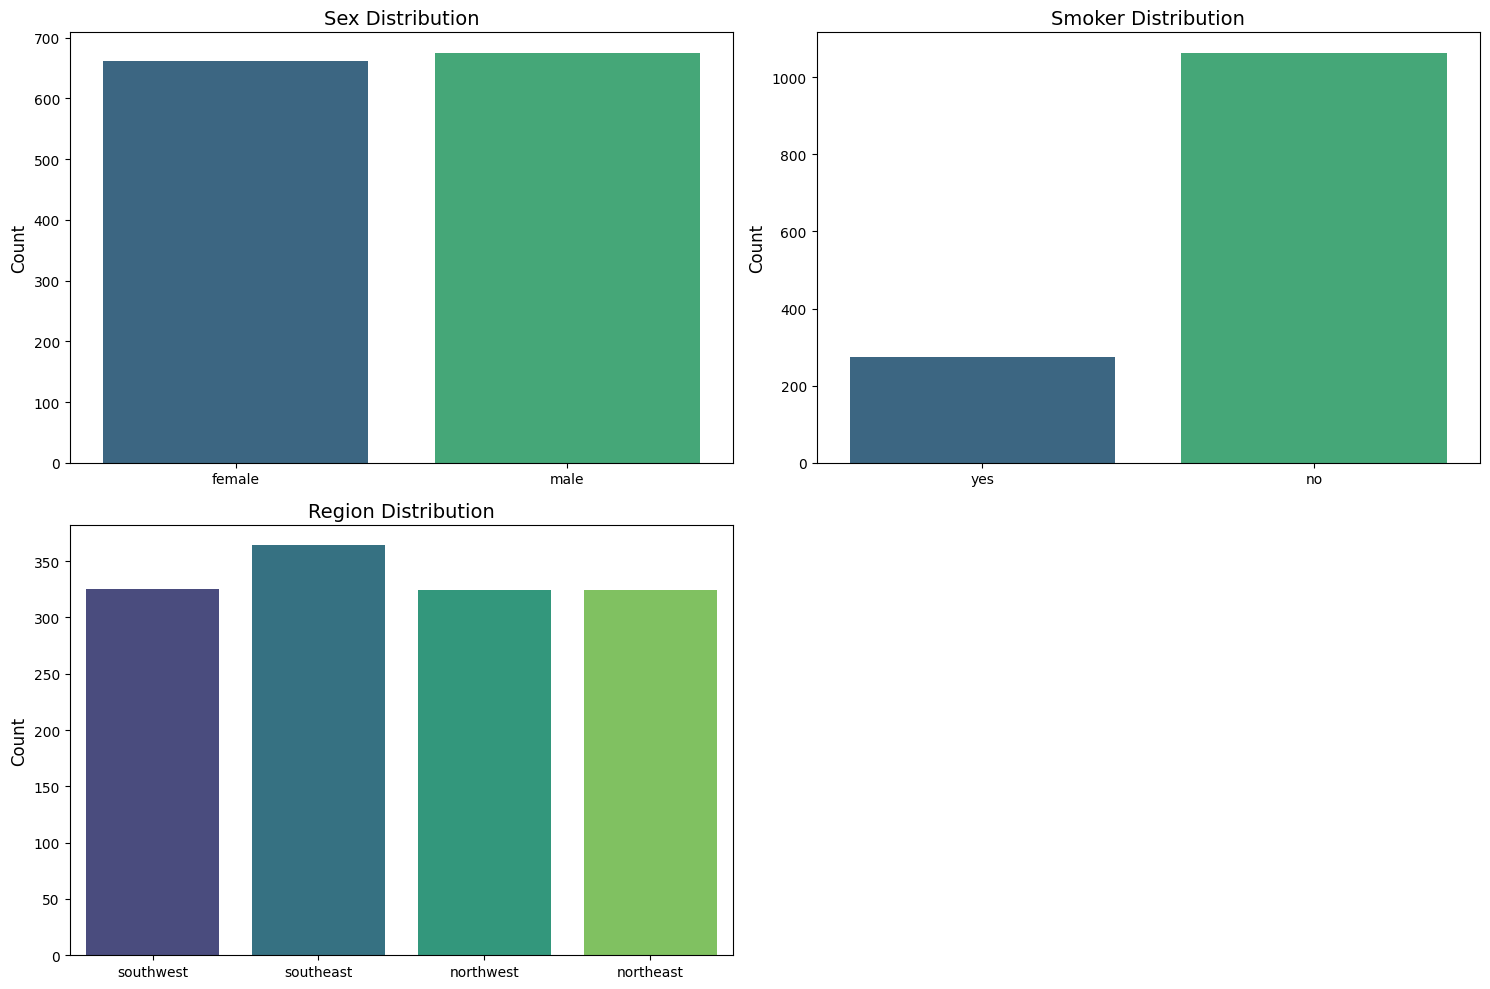

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# --- Plot for 'sex' (Row 0, Column 0) ---
sns.countplot(data=total_data, x = "sex", ax=axes[0,0], palette='viridis')
axes[0, 0].set_title("Sex Distribution", fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count', fontsize=12)

# --- Plot for 'smoker' (Row 0, Column 1) ---
sns.countplot(data=total_data, x = "smoker", ax=axes[0,1], palette='viridis')
axes[0, 1].set_title("Smoker Distribution", fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count', fontsize=12)

# --- Plot for 'region' (Row 1, Column 0) ---
sns.countplot(data=total_data, x = "region", ax=axes[1,0], palette='viridis')
axes[1, 0].set_title("Region Distribution", fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count', fontsize=12)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

**Conclusions**:

- **Sex**: There is no significant difference between male and female in terms of distribution.
- **Smoker**: The vast majority of the population is non-smoker, with around a 20 percentage of smokers. This imbalanced distribution will be a significant factor for the model.
- **Region**: This is a relatively balanced distribution, with the South being the most represented region. This will be a significant factor too for the model.

### 4.3 Numerical Variable Analysis <a id='c4-3'></a>

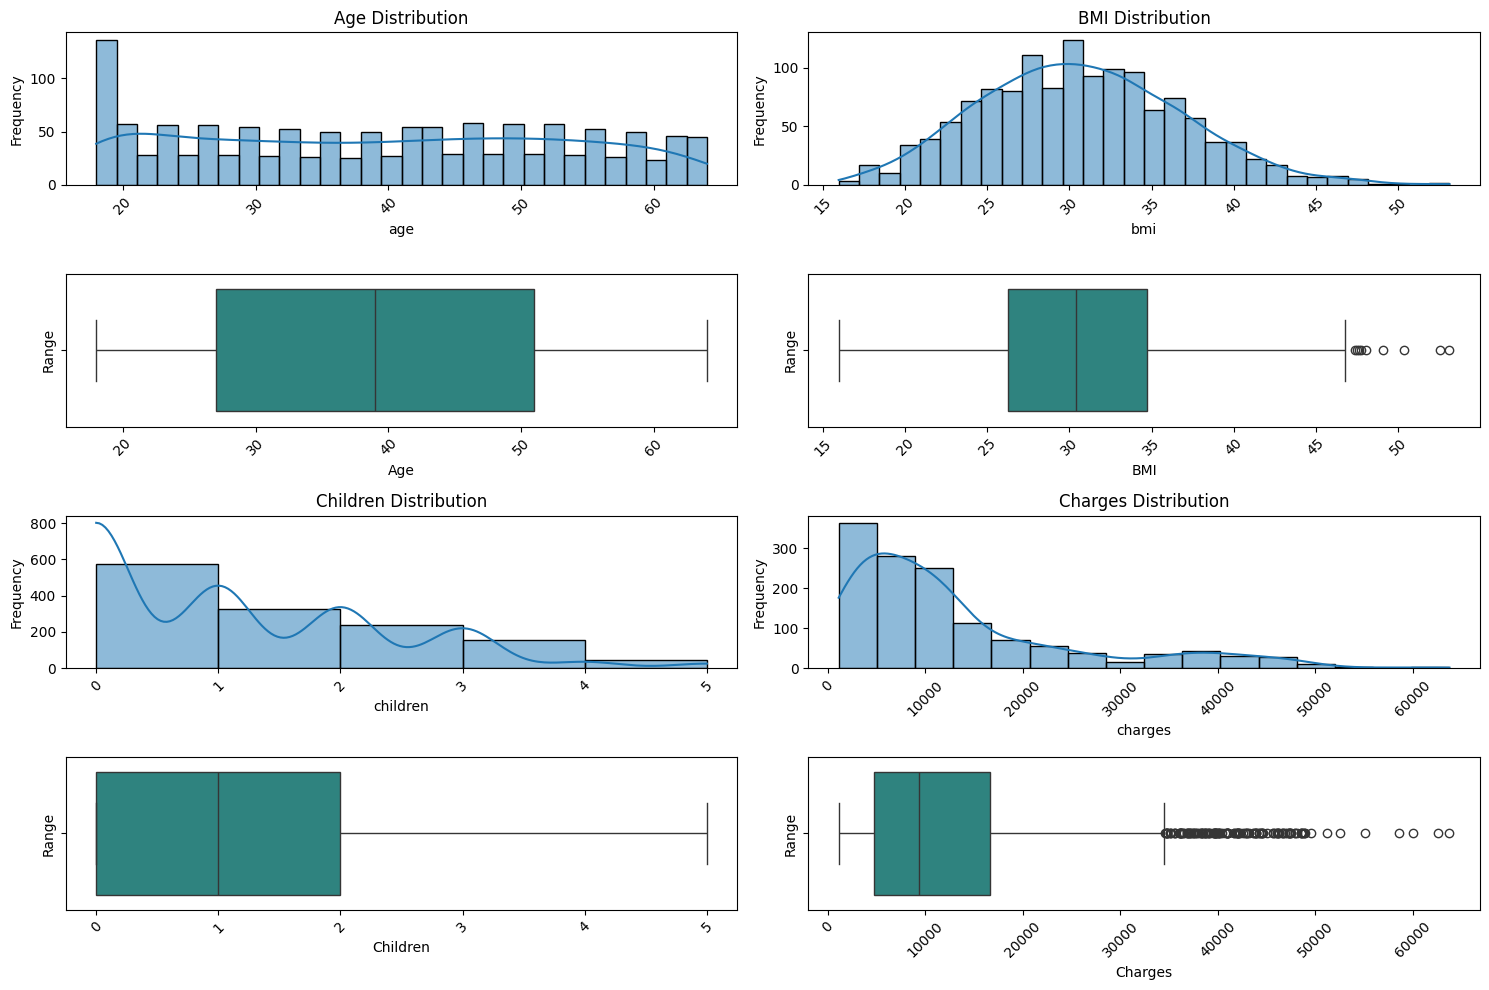

In [242]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

#['age', 'bmi', 'children', 'charges']
# --- Plot for 'age' (Row 0, Column 0) ---
sns.histplot(
    data=total_data, x="age", kde=True, bins=30, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Age Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
axes[0, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'age'
sns.boxplot(data=total_data, x="age", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].set_xlabel("Age", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].tick_params(axis="x", rotation=45)


# --- Plot for 'bmi' (Row 0, Column 1) ---
sns.histplot(
    data=total_data, x="bmi", kde=True, bins=30, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("BMI Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)
axes[0, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'bmi'
sns.boxplot(data=total_data, x="bmi", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].set_xlabel("BMI", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].tick_params(axis="x", rotation=45)


# --- Plot for 'children' (Row 1, Column 0) ---
sns.histplot(
    data=total_data, x="children", kde=True, bins=5, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("Children Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)
axes[2, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'children'
sns.boxplot(data=total_data, x="children", ax=axes[3, 0], palette="viridis")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].set_xlabel("Children", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].tick_params(axis="x", rotation=45)


# --- Plot for 'charges' (Row 1, Column 1) ---
sns.histplot(
    data=total_data, x="charges", kde=True, bins=16, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("Charges Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)
axes[2, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'charges'
sns.boxplot(data=total_data, x="charges", ax=axes[3, 1], palette="viridis")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].set_xlabel("Charges", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)
axes[3, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

**Conclusions**:

- **Age**: The age distribution is uniform with a big increase in the 18-20 age range, which is the most represented group.
- **BMI (Body Mass Index):** This plot shows a platykurtic curve with the highest concentration of people in the 20-30 range, with a significant number of people in the 30-35 range.
- **Children:** This a highly positively skewed distribution, with most of the population having 0 children, and a few people having up to 5 children.
- **Charges:** This plot shows a highly positively skewed distribution, with most of the population having charges below 10000, and a few people having charges above 20000.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Encoding Categorical Values and Saving JSON Files <a id='c5-1'></a>

In [243]:
output_dir = os.path.join('factorize_data')
os.makedirs(output_dir, exist_ok=True)

total_data_factorized = total_data.copy()

for categorical_col_name in categorical_variables:
    codes, uniques = pd.factorize(total_data[categorical_col_name])
    transformation_rules = {original_cat: int(code) for code, original_cat in enumerate(uniques)}
    total_data_factorized[categorical_col_name] = codes
    json_file_path = os.path.join(output_dir, f"factorized_{categorical_col_name}.json")

    with open(json_file_path, "w") as f:
        json.dump(transformation_rules, f, indent=4)

total_data_factorized.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.92
1,18,1,33.77,1,1,1,1725.55
2,28,1,33.00,3,1,1,4449.46
3,33,1,22.70,0,1,2,21984.47
4,32,1,28.88,0,1,2,3866.86


### 5.2 Numerical-Categorical Analysis <a id='c5-2'></a>

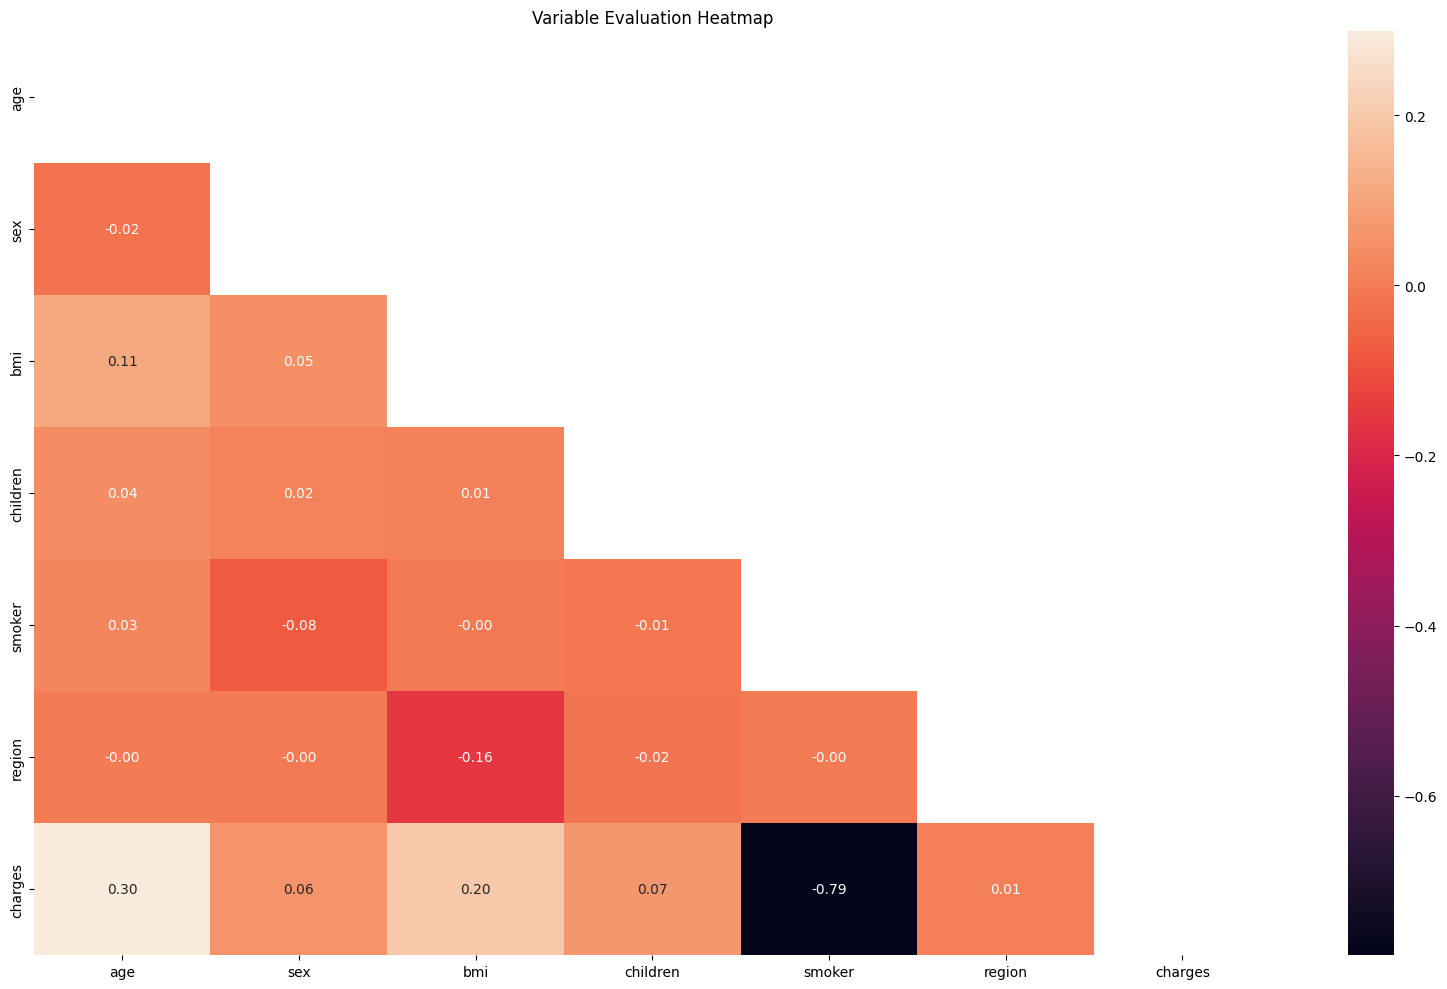

In [244]:
plt.figure(figsize=(16,10))
columns = total_data_factorized.columns
sns.heatmap(total_data_factorized[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data_factorized[columns].corr()))
plt.title('Variable Evaluation Heatmap')
plt.tight_layout()
plt.show()

**Conclusions:**

- **Strongest Positive Correlation with 'charges'**: The `smoker` variable is the most positively correlated with the target variable `charges` with a correlation of 0.79, meaning that smokers tend to have higher charges than non-smokers. This is expected as smoking is associated with higher health risks and costs.
- **Positive Correlation with 'charges'**: Other positive correlations with `charges` include `age` (0.30) and `bmi` (0.20). This suggests that older individuals and those with higher BMI tend to incur higher medical charges, which aligns with common health trends.

**Other conclusions:**

- **`bmi`**: The `bmi` variable has a moderate positive correlation with `age` which indicates that as people age, their BMI tends to increase.
- **`smoker`**: The `smoker` variable has a slighlt negative correaltion with `sex` (-0.08), suggesting that there is a slight difference in smoking habits between sexes.
- **`region`**: The `region` variable has a weak negative correlation with `bmi` (-0.16) meaning that people in the South region tend to have a slightly lower BMI compared to other regions. This could be due to various lifestyle and dietary factors prevalent in different regions.

## 6. Feature Engineering <a id='c6'></a>

### 6.1 New Feature Inference <a id='c6-1'></a>

We can make an interesting variable called `has_children` that will be a boolean variable that will indicate if the person has children or not. This will be useful for the model to understand if the person has children or not, and how it affects the charges.

In [245]:
total_data_factorized['has_children'] = total_data_factorized['children'].apply(lambda x: 1 if x > 0 else 0)
total_data_factorized['has_children'].head()

0    0
1    1
2    1
3    0
4    0
Name: has_children, dtype: int64

### 6.1.1 Categorical Analysis for has_children <a id='c6-1-1'></a>

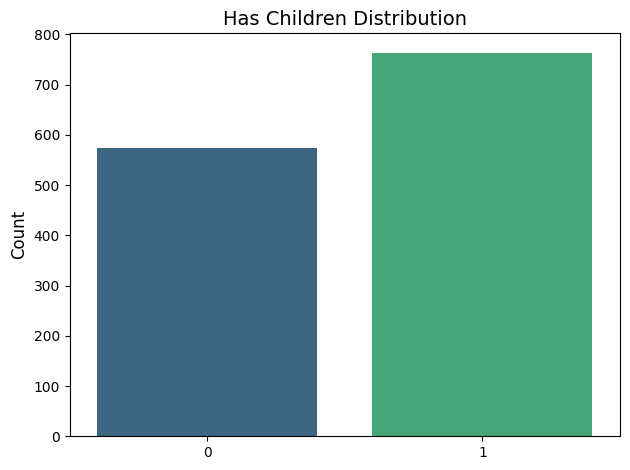

In [246]:
sns.countplot(data=total_data_factorized, x = "has_children", palette='viridis')
plt.title("Has Children Distribution", fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

**Conclusion**: There is more clients with children than without children, which is expected as the majority of the population has children. This won't be a significant factor for the model but it will be useful to understand the data better.
I've made this to do an example of how to do a feature instance.

### 6.1.2 Numerical-Categorical Analysis for new feature <a id='c6-1-2'></a>

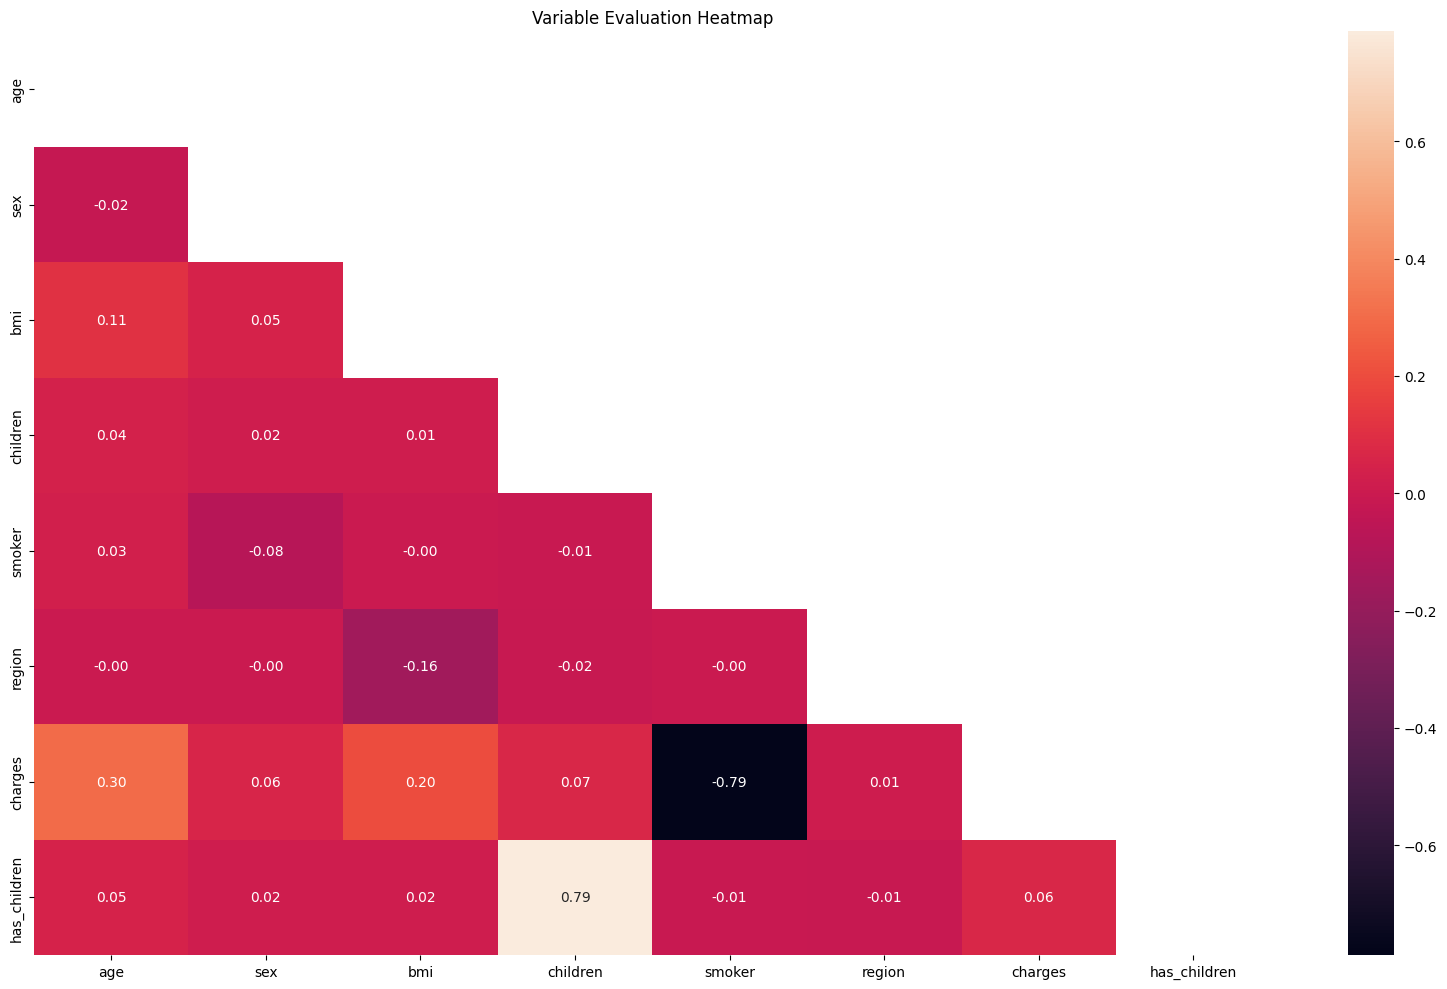

In [247]:
plt.figure(figsize=(16,10))
columns = total_data_factorized.columns
sns.heatmap(total_data_factorized[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data_factorized[columns].corr()))
plt.title('Variable Evaluation Heatmap')
plt.tight_layout()
plt.show()

**Conclusion**: There is slightly any difference between the charges of people with children and without children.

### 6.2 Outliers Analysis <a id='c6-2'></a>

In [248]:
total_data.describe().round(2)

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


In [249]:
total_data_factorized_WITH_outliers = total_data_factorized.copy()

total_data_factorized_WITHOUT_outliers = total_data_factorized.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), {"lower_limit": lower_limit, "upper_limit": upper_limit}

outliers_dict = {}

output_dir = os.path.join('outliers_lims')
os.makedirs(output_dir, exist_ok=True)

for column in ['bmi']:
  total_data_factorized_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, total_data_factorized_WITHOUT_outliers)
  outliers_dict[column] = limit_list
  filename_outliers = f'./outliers_lims/{column}.json'
  with open(filename_outliers, "w") as f:
        json.dump(limit_list, f, indent=4)


outliers_dict

{'bmi': {'lower_limit': np.float64(13.674999999999994),
  'upper_limit': np.float64(47.31500000000001)}}

In [250]:
total_data_factorized_WITHOUT_outliers

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,0,27.90,0,0,0,16884.92,0
1,18,1,33.77,1,1,1,1725.55,1
2,28,1,33.00,3,1,1,4449.46,1
3,33,1,22.70,0,1,2,21984.47,0
4,32,1,28.88,0,1,2,3866.86,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.97,3,1,2,10600.55,1
1334,18,0,31.92,0,1,3,2205.98,0
1335,18,0,36.85,0,1,1,1629.83,0
1336,21,0,25.80,0,1,0,2007.94,0


In [251]:
total_data_factorized_WITH_outliers

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,0,27.90,0,0,0,16884.92,0
1,18,1,33.77,1,1,1,1725.55,1
2,28,1,33.00,3,1,1,4449.46,1
3,33,1,22.70,0,1,2,21984.47,0
4,32,1,28.88,0,1,2,3866.86,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.97,3,1,2,10600.55,1
1334,18,0,31.92,0,1,3,2205.98,0
1335,18,0,36.85,0,1,1,1629.83,0
1336,21,0,25.80,0,1,0,2007.94,0


### 6.3 Missing Values Analysis <a id='c6-3'></a>

As we don't have any missing data we won't procede filling the missing data with any technique

In [252]:
total_data_factorized_WITH_outliers.isnull().sum().sort_values(ascending=False)

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
has_children    0
dtype: int64

### 6.4 Split train/test of both Data Frames <a id='c6-4'></a>

A crucial step in data preparation is splitting the dataset into training (train) and testing (test) sets. This is vital for two main reasons:

- **Prevent Overfitting**: It ensures the model learns generalizable patterns from the train set rather than simply memorizing noise or specific training examples.

- **Evaluate Generalization**: By assessing performance on the unseen test set, we gain a realistic estimate of how well the model will perform on new, real-world data.

In [253]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    X_train.to_excel(f'../data/processed/X_train_{reference}.xlsx', index=False)
    X_test.to_excel(f'../data/processed/X_test_{reference}.xlsx', index=False)
    y_train.to_excel('../data/processed/y_train.xlsx', index=False)
    y_test.to_excel('../data/processed/y_test.xlsx', index=False)

    return X_train, X_test, y_train, y_test

In [254]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', total_data_factorized_WITH_outliers, 'with_outliers')
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', total_data_factorized_WITHOUT_outliers, 'without_outliers')

try:
    X_train_with_outliers = pd.read_excel('../data/processed/X_train_with_outliers.xlsx')
    X_train_without_outliers = pd.read_excel('../data/processed/X_train_without_outliers.xlsx')

    X_test_with_outliers = pd.read_excel('../data/processed/X_test_with_outliers.xlsx')
    X_test_without_outliers = pd.read_excel('../data/processed/X_test_without_outliers.xlsx')


    # Cargar y_train y y_test (estos son comunes para todos los X)
    y_train = pd.read_excel('../data/processed/y_train.xlsx').squeeze()
    y_test = pd.read_excel('../data/processed/y_test.xlsx').squeeze()

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 7. Data Processing <a id='c7'></a>

### 7.1 Normalization <a id='c7-1'></a>

We'll proceede to normalize and save both dataframes with and without outliers

In [255]:
def norm(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = StandardScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_train_norm.to_excel(f'../data/processed/X_train_{reference}_norm.xlsx', index=False)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
    X_test_norm.to_excel(f'../data/processed/X_test_{reference}_norm.xlsx', index=False)

    return X_train_norm, X_test_norm

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_norm.head()

try:
    X_train_with_outliers_norm = pd.read_excel('../data/processed/X_train_with_outliers_norm.xlsx')
    X_train_without_outliers_norm = pd.read_excel('../data/processed/X_train_without_outliers_norm.xlsx')

    X_test_with_outliers_norm = pd.read_excel('../data/processed/X_test_with_outliers_norm.xlsx')
    X_test_without_outliers_norm = pd.read_excel('../data/processed/X_test_without_outliers_norm.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


### 7.2 Minmax Scalation <a id='c7-2'></a>

In [256]:
def minmax(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)
    X_train_minmax.to_excel(f'../data/processed/X_train_{reference}_minmax.xlsx', index=False)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    X_test_minmax.to_excel(f'../data/processed/X_test_{reference}_minmax.xlsx', index=False)

    return X_train_minmax, X_test_minmax

X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_minmax.head()

try:
    X_train_with_outliers_minmax = pd.read_excel('../data/processed/X_train_with_outliers_minmax.xlsx')
    X_train_without_outliers_minmax = pd.read_excel('../data/processed/X_train_without_outliers_minmax.xlsx')

    X_test_with_outliers_minmax = pd.read_excel('../data/processed/X_test_with_outliers_minmax.xlsx')
    X_test_without_outliers_minmax = pd.read_excel('../data/processed/X_test_without_outliers_minmax.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 8. Machine Learning <a id='c8'></a>

### 8.1 Which is the best dataset? <a id='c8-1'></a>

Now we choose the best dataset

In [257]:
results = []

dataset_references = {
    "X_train_with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "X_train_without_outliers": (X_train_without_outliers, X_test_without_outliers),
    "X_train_with_outliers_norm": (X_train_with_outliers_norm, X_test_with_outliers_norm),
    "X_train_without_outliers_norm": (X_train_without_outliers_norm, X_test_without_outliers_norm),
    "X_train_with_outliers_minmax": (X_train_with_outliers_minmax, X_test_with_outliers_minmax),
    "X_train_without_outliers_minmax": (X_train_without_outliers_minmax, X_test_without_outliers_minmax),
}

for dataset_name, (X_train_ds, X_test_ds) in dataset_references.items():
    model = LinearRegression()
    model.fit(X_train_ds, y_train)
    y_pred = model.predict(X_test_ds)
    mse = round(mean_squared_error(y_test, y_pred), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    r2 = round(r2_score(y_test, y_pred), 4)
    results.append({
        "dataset_name": dataset_name,
        "R2": r2,
        "MSE": mse,
        "MAE": mae
    })

results_df = pd.DataFrame(results).sort_values(by='MSE', ascending=True)
print(results_df)
# Since there is more than one best datasets we will choose the one with normalization
winning_dataset_name = results_df.iloc[1]["dataset_name"]
winning_dataset_X_train, best_X_test = dataset_references[winning_dataset_name]
print(f'The best dataset is {winning_dataset_name} with a MSE of {results_df.iloc[1]["MSE"]:.4f}')

                      dataset_name      R2           MSE        MAE
1         X_train_without_outliers  0.7975  3.129263e+07  3915.1488
3    X_train_without_outliers_norm  0.7975  3.129263e+07  3915.1488
5  X_train_without_outliers_minmax  0.7975  3.129263e+07  3915.1488
0            X_train_with_outliers  0.7974  3.130812e+07  3910.2539
2       X_train_with_outliers_norm  0.7974  3.130812e+07  3910.2539
4     X_train_with_outliers_minmax  0.7974  3.130812e+07  3910.2539
The best dataset is X_train_without_outliers_norm with a MSE of 31292629.4044


### 8.2 Model Optimization <a id='c8-2'></a>

Now we'll make different Linear Regression models using *Lasso and Ridge* with the best dataset identified previously.

#### 8.2.1 Ridge

In [258]:
ridge_model = Ridge(alpha=0.01, max_iter=300)
ridge_model.fit(winning_dataset_X_train, y_train)
y_pred_ridge = ridge_model.predict(best_X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("--- Ridge Model Evaluation---")
print(f"R^2 Score: {r2_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")

--- Ridge Model Evaluation---
R^2 Score: 0.7975
Mean Squared Error (MSE): 31292798.18
Mean Absolute Error (MAE): 3915.17


#### 8.2.2 Lasso

In [259]:
lasso_model = Lasso(alpha=0.1, max_iter=300)
lasso_model.fit(winning_dataset_X_train, y_train)
y_pred_lasso = lasso_model.predict(best_X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("--- Lasso Model Evaluation ---")
print(f"R^2 Score: {r2_lasso:.4f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")

--- Lasso Model Evaluation ---
R^2 Score: 0.7975
Mean Squared Error (MSE): 31292667.35
Mean Absolute Error (MAE): 3915.13


### 8.3 Evaluation of the Model <a id='c8-3'></a>

Once both models have similar results and they're worst than the baseline model, we'll proceed to choose the vanilla Linear Regression model as the best model.

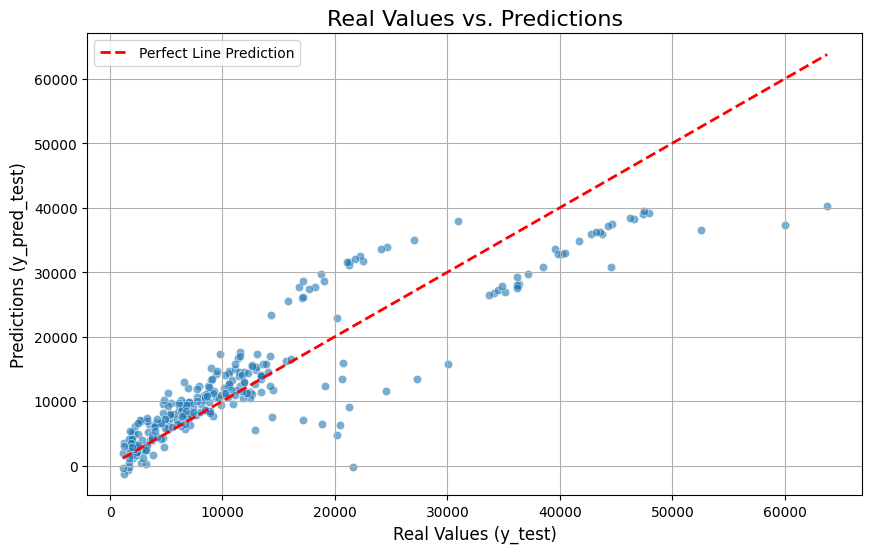

--- Final Model Evaluation---
R^2 Score: 0.7975
Mean Squared Error (MSE): 31292629.40
Mean Absolute Error (MAE): 3915.15


In [260]:
final_model = LinearRegression()
final_model.fit(winning_dataset_X_train, y_train)
y_pred_test = final_model.predict(best_X_test)
final_r2 = r2_score(y_test, y_pred_test)
final_mse = mean_squared_error(y_test, y_pred_test)
final_mae = mean_absolute_error(y_test, y_pred_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Line Prediction')

plt.title('Real Values vs. Predictions', fontsize=16)
plt.xlabel('Real Values (y_test)', fontsize=12)
plt.ylabel('Predictions (y_pred_test)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("--- Final Model Evaluation---")
print(f"R^2 Score: {final_r2:.4f}")
print(f"Mean Squared Error (MSE): {final_mse:.2f}")
print(f"Mean Absolute Error (MAE): {final_mae:.2f}")

with open('../models/final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [261]:
X_train_with_outliers_norm.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'has_children'], dtype='object')